In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
url = "https://raw.githubusercontent.com/YaswanthAdari/Gradient_descent_/main/Folds5x2_pp.csv"
data = pd.read_csv(url)
data = data.dropna()
data = data.drop_duplicates()
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [6]:
x = data.iloc[0:, 0:4].values
y = data.iloc[0:, 4:].values

In [7]:
x

array([[   8.34,   40.77, 1010.84,   90.01],
       [  23.64,   58.49, 1011.4 ,   74.2 ],
       [  29.74,   56.9 , 1007.15,   41.91],
       ...,
       [  15.99,   43.34, 1014.2 ,   78.66],
       [  17.65,   59.87, 1018.58,   94.65],
       [  23.68,   51.3 , 1011.86,   71.24]])

In [8]:
y

array([[480.48],
       [445.75],
       [438.76],
       ...,
       [465.96],
       [450.93],
       [451.67]])

In [9]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(7621, 4)
(7621, 1)
(1906, 4)
(1906, 1)


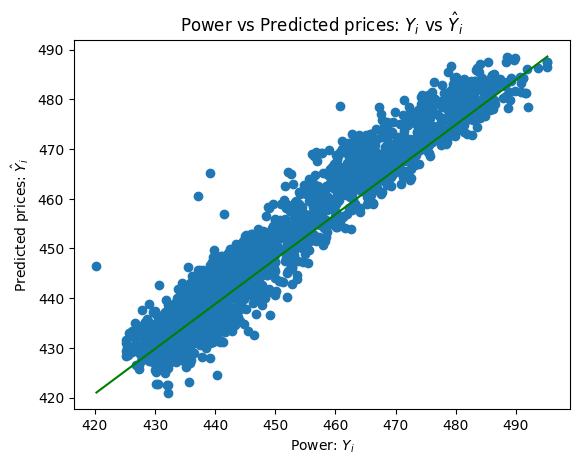

In [15]:
model = LinearRegression()
model.fit(train_X, train_Y)
y_pred = model.predict(test_X)

plt.plot([min(test_Y), max(test_Y)], [min(y_pred), max(y_pred)], color='green')
plt.scatter(test_Y, y_pred)
plt.xlabel("Power: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Power vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [13]:
sklearn_pred_df = pd.DataFrame(
    {
        'Actual Value' : test_Y.ravel(), 
     'Predicted Values' : y_pred.ravel()
    }
)
sklearn_pred_df.head(10)

,Actual Value,Predicted Values
0,473.64,472.541090
1,448.22,453.361683
2,432.41,435.917024
3,464.12,467.216073
4,447.07,450.581843
5,458.26,460.419839
6,437.92,432.865433
7,454.51,458.414794
8,466.83,462.785414
9,438.00,445.733327
